Цель работы: изучение связи между признаками двумерного набора данных, визуализация данных.

### Описание предметной области
Вариант 8

Набор данных drivers2.csv

## 1. Загрузка данных и их предобработка

Для начала необходимо скачать файл drivers2.csv, после чего загрузить его в объект DataFrame библиотеки Pandas (импортировав её перед этим).

In [4]:
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
import seaborn as sns


df = pd.read_csv("C:\\Users\\vanya\\Downloads\\drivers2.csv")
print("File is read")
display(df)

File is read


,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*,time,speed,price
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,6.0,51.000000,788.0
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NaN,12.0,25.000000,1237.0
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,13.0,22.153846,1312.0
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,14.0,20.142857,1387.0
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,67.0,57.044776,5376.0
...,...,...,...,...,...,...,...,...,...,...
1094,2016-12-22 19:04:00,2016-12-22 19:50:00,Business,Unknown Location,Lahore,14.0,Meeting,46.0,18.260870,3787.0
1095,2016-12-22 21:41:00,2016-12-22 21:53:00,Business,Lahore,Lahore,2.1,Meal/Entertain,12.0,10.500000,1237.0
1096,2016-12-22 23:27:00,2016-12-22 23:32:00,Business,Lahore,Lahore,2.1,Customer Visit,5.0,25.200000,712.0
1097,2016-12-23 09:21:00,2016-12-23 09:41:00,Business,Lahore,Lahore,3.0,Meeting,20.0,9.000000,1836.0


Далее выполняется предобработка данных (просмотр всех типов данных, с заменой на необходимые, а также удаление явных и неявных дубликатов)

In [5]:
display(df.info())
display(df.describe(include='all'))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1099 entries, 0 to 1098
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   START_DATE*  1099 non-null   object 
 1   END_DATE*    1099 non-null   object 
 2   CATEGORY*    1099 non-null   object 
 3   START*       1099 non-null   object 
 4   STOP*        1099 non-null   object 
 5   MILES*       1099 non-null   float64
 6   PURPOSE*     598 non-null    object 
 7   time         1099 non-null   float64
 8   speed        1099 non-null   float64
 9   price        1099 non-null   float64
dtypes: float64(4), object(6)
memory usage: 86.0+ KB


None

C:\Users\vanya\OneDrive\Desktop\Lab1\.venv\lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*,time,speed,price
count,1099,1099,1099,1099,1099,1099.000000,598,1099.000000,1099.000000,1099.000000
unique,1099,1099,2,174,185,NaN,10,NaN,NaN,NaN
top,2016-12-23 11:33:00,2016-12-23 11:58:00,Business,Cary,Cary,NaN,Meeting,NaN,NaN,NaN
freq,1,1,1022,201,202,NaN,178,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,10.803094,NaN,23.300273,inf,2085.929936
std,NaN,NaN,NaN,NaN,NaN,22.044580,NaN,27.745836,NaN,2084.368402
min,NaN,NaN,NaN,NaN,NaN,0.500000,NaN,0.000000,3.917355,337.000000
25%,NaN,NaN,NaN,NaN,NaN,2.900000,NaN,10.000000,15.346667,1087.000000
50%,NaN,NaN,NaN,NaN,NaN,6.000000,NaN,16.000000,21.333333,1539.000000
75%,NaN,NaN,NaN,NaN,NaN,10.500000,NaN,27.000000,28.915033,2365.500000


Тип данных в колоннах CATEGORY* и PURPOSE* заменяется на 'category':

In [27]:
dict_types = {'START_DATE*': 'datetime64[ns]', 'END_DATE*': 'datetime64[ns]', 'CATEGORY*': 'category', 'START*': 'object',
              'STOP*': 'object', 'MILES*': 'float64', 'PURPOSE*': 'category', 'time': 'float64', 'speed': 'float64', 'price': 'float64'}
df = df.astype(dict_types)
display(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 1095 entries, 0 to 1098
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   START_DATE*  1095 non-null   datetime64[ns]
 1   END_DATE*    1095 non-null   datetime64[ns]
 2   CATEGORY*    1095 non-null   category      
 3   START*       1095 non-null   object        
 4   STOP*        1095 non-null   object        
 5   MILES*       1095 non-null   float64       
 6   PURPOSE*     598 non-null    category      
 7   time         1095 non-null   float64       
 8   speed        1095 non-null   float64       
 9   price        1095 non-null   float64       
 10  class_time   886 non-null    category      
dtypes: category(3), datetime64[ns](2), float64(4), object(2)
memory usage: 80.8+ KB


None

Функция astype() по умолчанию не умеет парсить дату и время, поэтому преобразование даты и времени осуществляется с помощью функции to_datetime().

In [7]:
df['START_DATE*'] = pd.to_datetime(df['START_DATE*'])
df['END_DATE*'] = pd.to_datetime(df['END_DATE*'])
display(df.info())
print(df.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1099 entries, 0 to 1098
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   START_DATE*  1099 non-null   datetime64[ns]
 1   END_DATE*    1099 non-null   datetime64[ns]
 2   CATEGORY*    1099 non-null   category      
 3   START*       1099 non-null   object        
 4   STOP*        1099 non-null   object        
 5   MILES*       1099 non-null   float64       
 6   PURPOSE*     598 non-null    category      
 7   time         1099 non-null   float64       
 8   speed        1099 non-null   float64       
 9   price        1099 non-null   float64       
dtypes: category(2), datetime64[ns](2), float64(4), object(2)
memory usage: 71.5+ KB


None

START_DATE*      0
END_DATE*        0
CATEGORY*        0
START*           0
STOP*            0
MILES*           0
PURPOSE*       501
time             0
speed            0
price            0
dtype: int64


Теперь находятся явные и неявные дубликаты и удаляются. Неявные дубликаты могут находиться в колонках: CATEGORY* и PURPOSE*, потому что точек старта и финиша может быть потенциально бесконечное количество.
В остальных колонках повторение не является критичным случаем. Также для того, чтобы недопустить искажения данных незаполненные записи удаляют, если их количество не превышает 10 процентов (в данном случае их 501 / 1099, что не позволяет их ни заполнить, потому что это в 3 раза больше текущей моды,  ни удалить, так как это серьезно повлияет на анализ остальных данных). Поэтому незаполненные значения остаются такими, как были.
Также было замечено при анализе общих данных, что есть бесконечные значения скорости и нулевые значения времени. И если со временем такое в теории может быть (но вообще нет), то бесконечная скорость здесь явно лишняя. Проанализируем все эти записи.

In [8]:
print(df.duplicated().sum())
display(df[df['speed'] == np.inf])
colomns = ['CATEGORY*', 'PURPOSE*']
for colomn in colomns:
    print(colomn)
    for note in df[colomn].unique():
        print(f"\t{note}")

0


,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*,time,speed,price
750,2016-09-06 17:49:00,2016-09-06 17:49:00,Business,Unknown Location,Unknown Location,69.1,NaN,0.0,inf,359.0
760,2016-09-16 07:08:00,2016-09-16 07:08:00,Business,Unknown Location,Unknown Location,1.6,NaN,0.0,inf,338.0
797,2016-10-08 15:03:00,2016-10-08 15:03:00,Business,Karachi,Karachi,3.6,NaN,0.0,inf,338.0
806,2016-10-13 13:02:00,2016-10-13 13:02:00,Business,Islamabad,Islamabad,0.7,NaN,0.0,inf,337.0


CATEGORY*
	Business
	Personal
PURPOSE*
	Meal/Entertain
	nan
	Errand/Supplies
	Meeting
	Customer Visit
	Temporary Site
	Between Offices
	Charity ($)
	Commute
	Moving
	Airport/Travel


Исходя из записей с бесконенчной скорости видно, что автомобиль проехал какое-то расстояние за нулевое время, что является бессмыслицей. И по скольку данных довольно мало (4 шт.), их можно удалить, при этом не исказив общую картину.
Просмотрев категории и цели поездки, сомнению подвергаются 3 колонки: Commute, Moving и Airport/Travel.
Для того, чтобы понять, что с этими данными делать необходимо посмотреть, какая информация хранится в них

In [9]:
df = df[~df['speed'].isin([np.inf, -np.inf])]
display(df[df['speed'] == np.inf])

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*,time,speed,price


In [10]:
Commute = df[df['PURPOSE*'] == 'Commute']
Moving = df[df['PURPOSE*'] == 'Moving']
Travel = df[df['PURPOSE*'] == 'Airport/Travel']

display(Commute)
display(Moving)
display(Travel)

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*,time,speed,price
558,2016-07-17 12:20:00,2016-07-17 15:25:00,Personal,Boone,Cary,180.2,Commute,185.0,58.443243,14252.0


,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*,time,speed,price
559,2016-07-18 10:37:00,2016-07-18 10:49:00,Personal,Cary,Morrisville,4.1,Moving,12.0,20.500000,1237.0
560,2016-07-18 10:54:00,2016-07-18 11:15:00,Personal,Morrisville,Cary,6.1,Moving,21.0,17.428571,1912.0
561,2016-07-18 11:25:00,2016-07-18 11:36:00,Personal,Northwoods,Preston,3.3,Moving,11.0,18.000000,1162.0
562,2016-07-18 11:40:00,2016-07-18 11:56:00,Personal,Preston,Whitebridge,4.7,Moving,16.0,17.625000,1537.0


,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*,time,speed,price
682,2016-08-21 10:00:00,2016-08-21 10:29:00,Business,Unknown Location,Unknown Location,7.6,Airport/Travel,29.0,15.724138,2512.0
1054,2016-12-17 15:38:00,2016-12-17 16:12:00,Business,Unknown Location,Unknown Location,4.8,Airport/Travel,34.0,8.470588,2885.0


Теперь становится понятно, что это 3 разные цели, которые отвечают за разное цели поездки (Поздка на дальние расстояния (есть только в одном экземпляре), поездка до аэропорта (как правило бизнес поездки) и переезд (в пределах города, как правило персональная))

Таким образом, все данные в DataFrame не имеют ни явных, ни неявных дубликатов. Что делает данные полностью предобработанными.

### 2. Построение матрицы диаграммы рассеивания

Предположим ситуацию, что данные предоставила компания такси. Значит одним из самых значимых сравнения будет попарное сравнение колонн: CATEGORY*, MILES*, PURPOSE*, time с колонкой price. Отобразим подобные зависимости на диаграмме рассеивания.

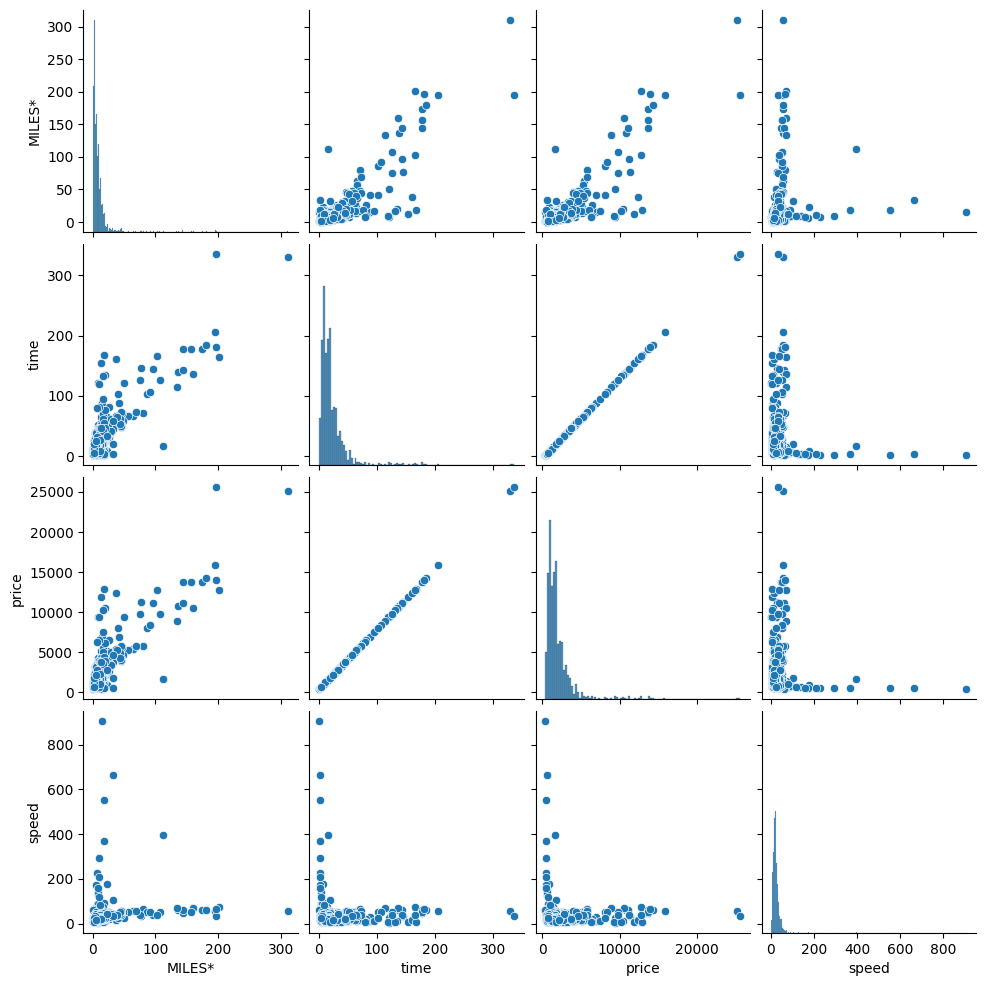

In [11]:
numeric_cols = ['MILES*', 'time', 'price', 'speed']
sns.pairplot(df[numeric_cols])

Исходя из данных графиков видно, что колонка "price" напрямую зависит от колонки "time". Также прослеживается некоторая корреляция между колонками "price" и "MILES*"; "time" и "MILES*", однако требует дополнительных исследований. Другие пары столбцов на первый взгляд обладают недостаточной корреляцией. Изучим более детально пары столбцов "price" и "MILES*"; "time" и "MILES*". Для этого отобразим диграмму рассеивания по категориям, что возможно поможет понять истинные причины, почему у столбцов именно такая корреляция. Следующим шагом рисуется тепловая карта корелляции, между всеми парами выбранных столбцов.

<Axes: xlabel='MILES_rounded', ylabel='price_rounded'>

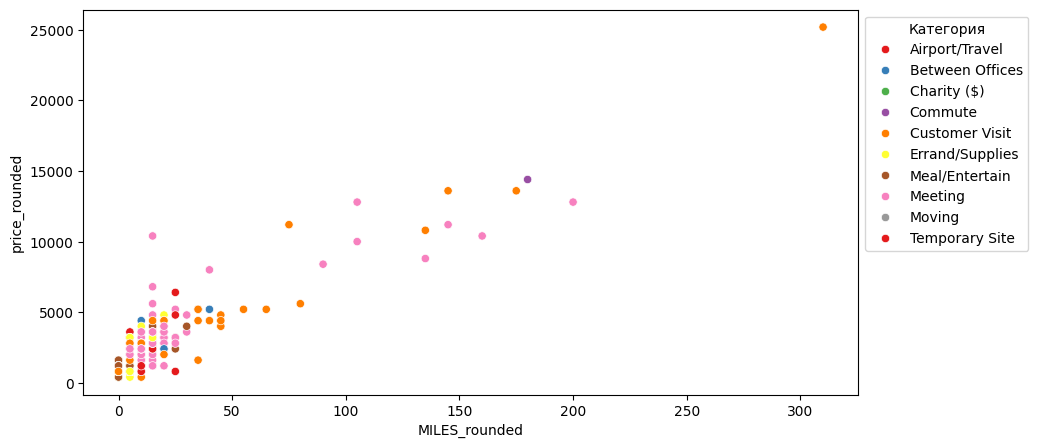

In [12]:
plt.figure(figsize=(10, 5))
display(sns.scatterplot(data=df.assign(MILES_rounded = (df['MILES*']/5).round() * 5).assign(price_rounded = (df['price']/400).round()*400),
                        x='MILES_rounded', y='price_rounded', hue='PURPOSE*', palette='Set1'))

plt.legend(title='Категория', bbox_to_anchor=(1, 1), loc='upper left')
plt.show()

Значения по оси милей округлены по пятеркам, а значения по оси цены округлены по 400. Это сделано для того, чтобы яснее разглядеть каждую из категорий по отедельности и оценить характер значений. Судя по графику, значения по каждой из категории имеют схожий коэффициент корреляции. 

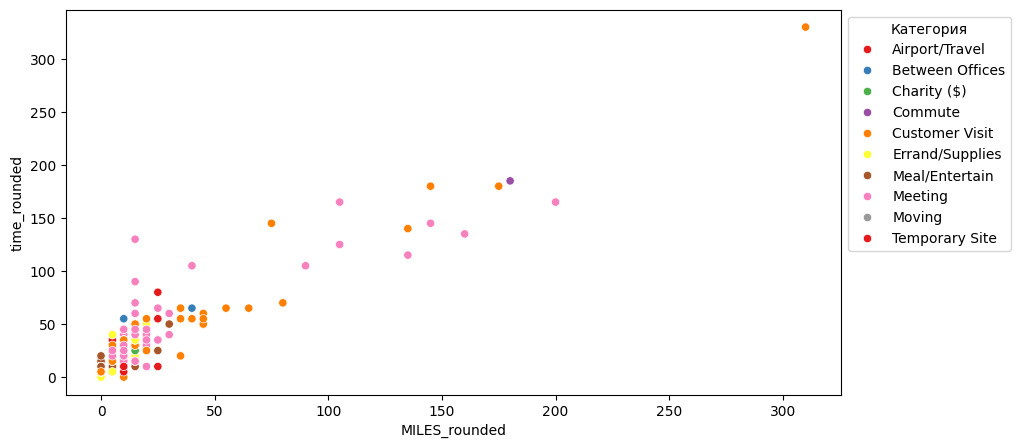

In [14]:
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df.assign(MILES_rounded = (df['MILES*']/5).round() * 5).assign(time_rounded = (df['time']/5).round()*5),
                        x='MILES_rounded', y='time_rounded', hue='PURPOSE*', palette='Set1')

plt.legend(title='Категория', bbox_to_anchor=(1, 1), loc='upper left')
plt.show()

Графики выглядят идентично, что говорит еще больше о корреляции столбцов "time" и "price".

### 3.Построение гистограммы

Экспериментальным путем были определены пределы отображения для всех числовых столбцов (каждый больше 75% значений, исходя из описания таблицы выше). Также под это значение было подобрано количество разбиений для корректного отображения (bins).

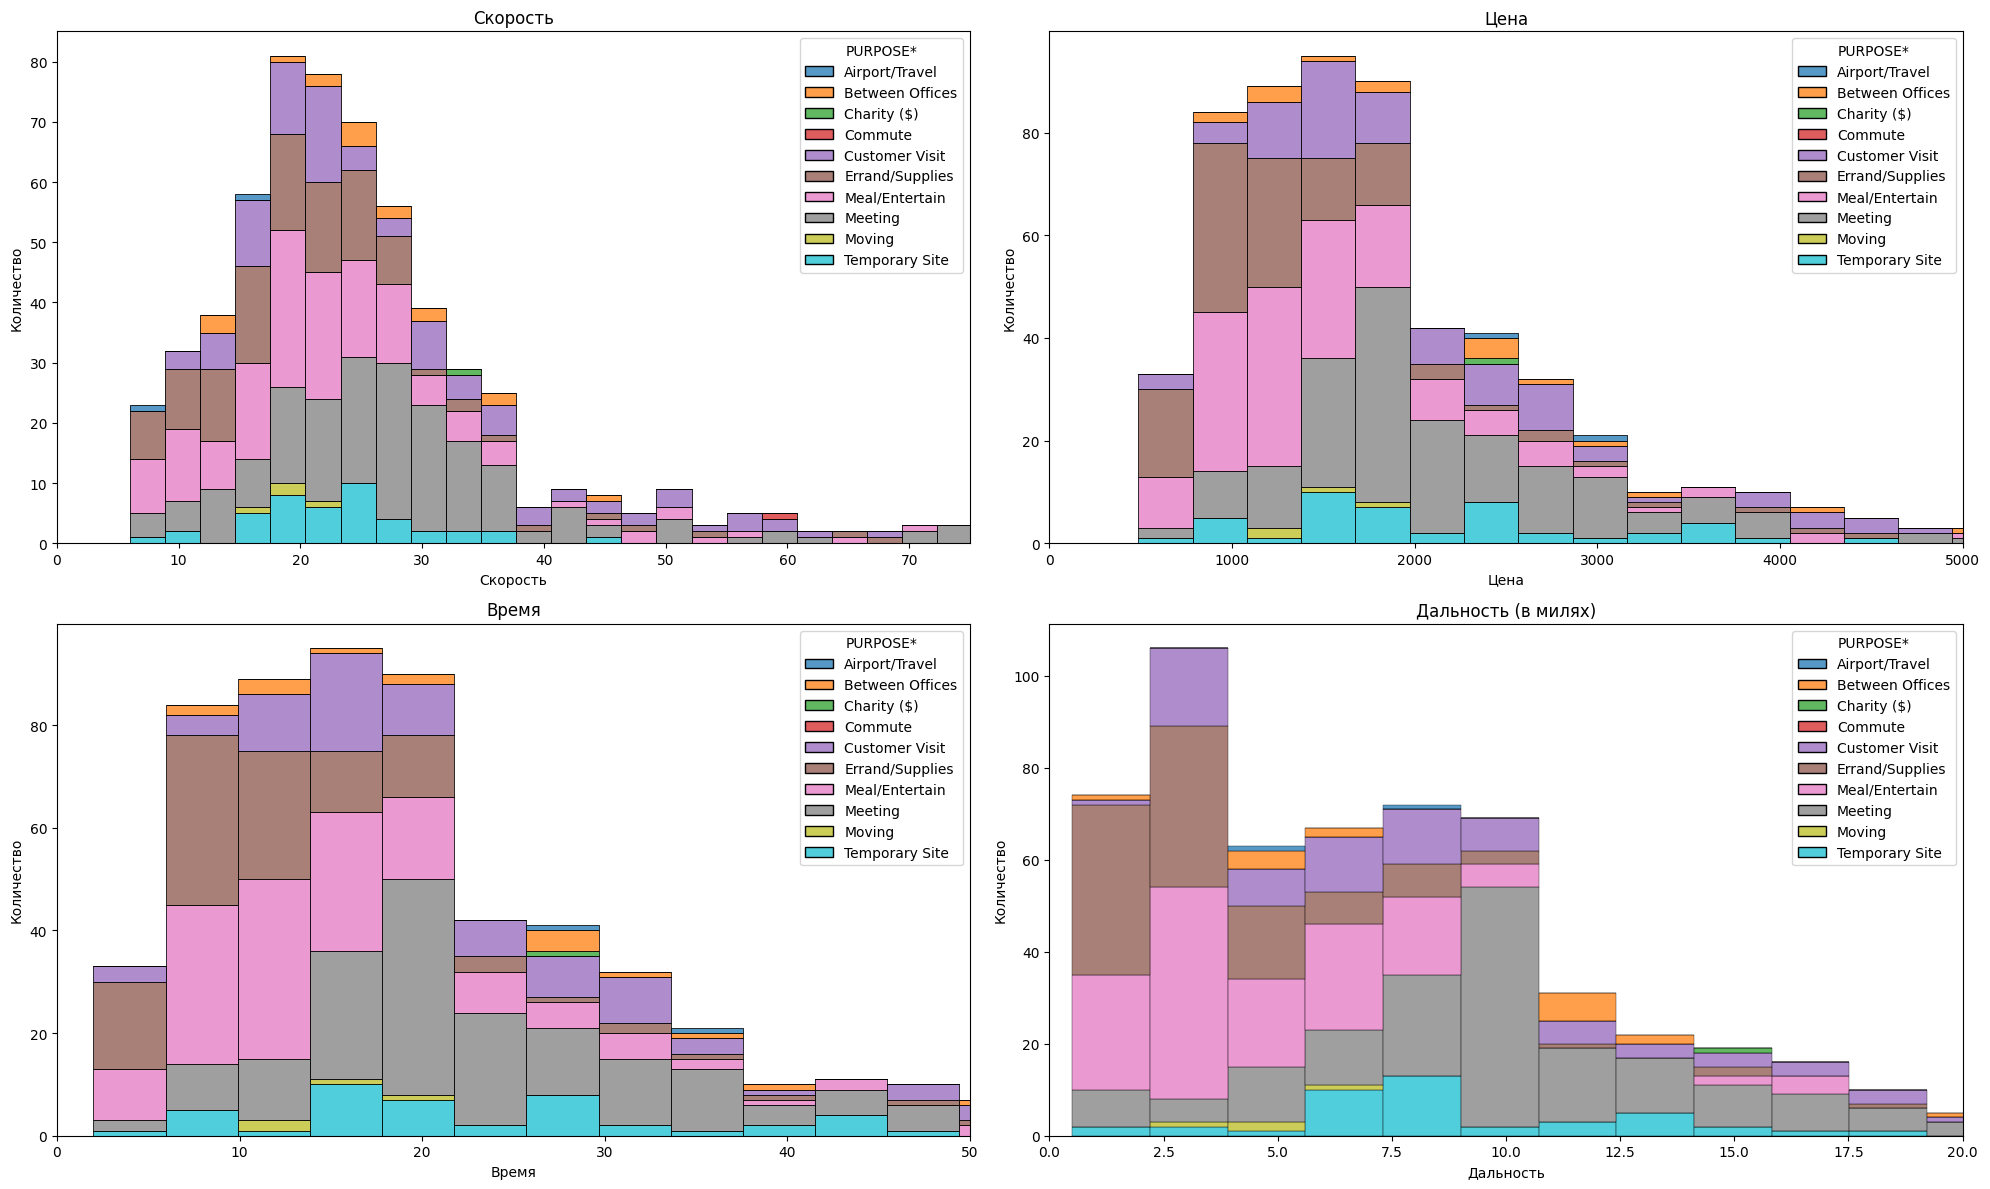

In [15]:
fig, axes = plt.subplots(2, 2, figsize=(20, 12))
axes = axes.flatten()

sns.histplot(data=df, x='speed', hue='PURPOSE*', multiple='stack', ax=axes[0])
sns.histplot(data=df, x='price', hue='PURPOSE*', multiple='stack', ax=axes[1])
sns.histplot(data=df, x='time', hue='PURPOSE*', multiple='stack', ax=axes[2])
sns.histplot(data=df, x='MILES*', hue='PURPOSE*', multiple='stack', ax=axes[3])

axes[0].set_title('Скорость')
axes[1].set_title('Цена')
axes[2].set_title('Время')
axes[3].set_title('Дальность (в милях)')

axes[0].set_ylabel("Количество");
axes[0].set_xlabel("Скорость");
axes[1].set_ylabel("Количество");
axes[1].set_xlabel("Цена");
axes[2].set_ylabel("Количество");
axes[2].set_xlabel("Время");
axes[3].set_ylabel("Количество");
axes[3].set_xlabel("Дальность");

axes[0].set_xlim(0, 75)
axes[1].set_xlim(0, 5000)
axes[2].set_xlim(0, 50)
axes[3].set_xlim(0, 20)

plt.tight_layout()
plt.show()

1) Скорость
После достижения средней скорости в 40 миль/час наблюдается резкое снижение количества записей.
Наибольшее количество записей имеет среднюю скорость немного меньше 20 миль/час
2) Цена
Самая популярная цена на такси - около 1100 рублей за поездку. Таких записей больше 90.
После достижения цены в 2000 рублей за поездку количество поездок значительно сокращается, за исключением цены около 2500 рублей.
3) Время
Наибольшее количество поездок приходится именно на 10 минут чистого времени. Таких записей также больше 90.
График практически идентичен графику цена. Скорее всего коэффициент корреляции этих двух столбцов > 0.95.
4) Дальность
Больше всего поездок по дальности около 2.5 миль (на промежуток от 1.5 до 3.5 миль приходится больше 200 записей, что почти 20%)


##### Все эти выводы объединяет следующее утверждение: Самый популярный тип поездок - на маленькие расстояния (скорее всего внутри города)

### 4. Корреляция и ковариация

Ковариация измеряет, как две переменные изменяются вместе, в то время как корреляция стандартизирует ковариацию, чтобы получить значение между [-1, 1].

,MILES*,time,speed,price
MILES*,484.414811,519.332857,187.193450,3.905647e+04
time,519.332857,770.653900,6.170935,5.789488e+04
speed,187.193450,6.170935,1950.082519,5.204055e+02
price,39056.466480,57894.879112,520.405543,4.349329e+06


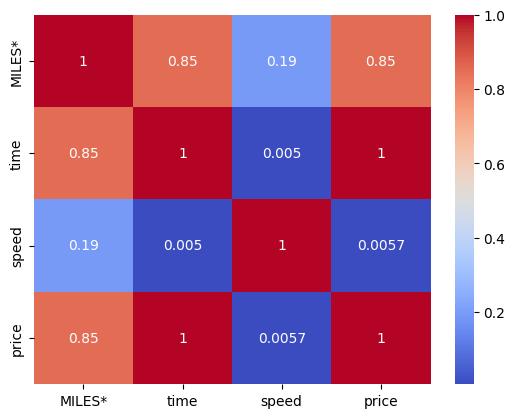

In [16]:
df_num = df.select_dtypes(include=[np.number])

corr_mtx = df_num.corr()
cov_mtx = df_num.cov()

display(cov_mtx)
print('\n')
sns.heatmap(corr_mtx, annot=True, cmap='coolwarm')
plt.show()

Выводы:
* Как было неоднократно сказано ранее, коэффициент корреляции между столбцами "price" и "time" равен 1. Это говорит о линейной зависимости этих между этими величинами.
* Очень высокий коэффициент корреляции столбцов "price" и "time" со столбцом "MILES*" (> 0.7). Это говорит о сильной зависимости пройденного пути от времени и цены, что вполне логично.
* Самый независимый столбец - "speed". Он не зависит от какого столбца.
* Нигде нет обратной корреляции. То есть нет коэффициента корреляции ниже 0.

### 5. Выполнение первого задания варианта

Для этого строится диаграмма поездок по различным целям в категориях: "Бизнес" и "Личные".

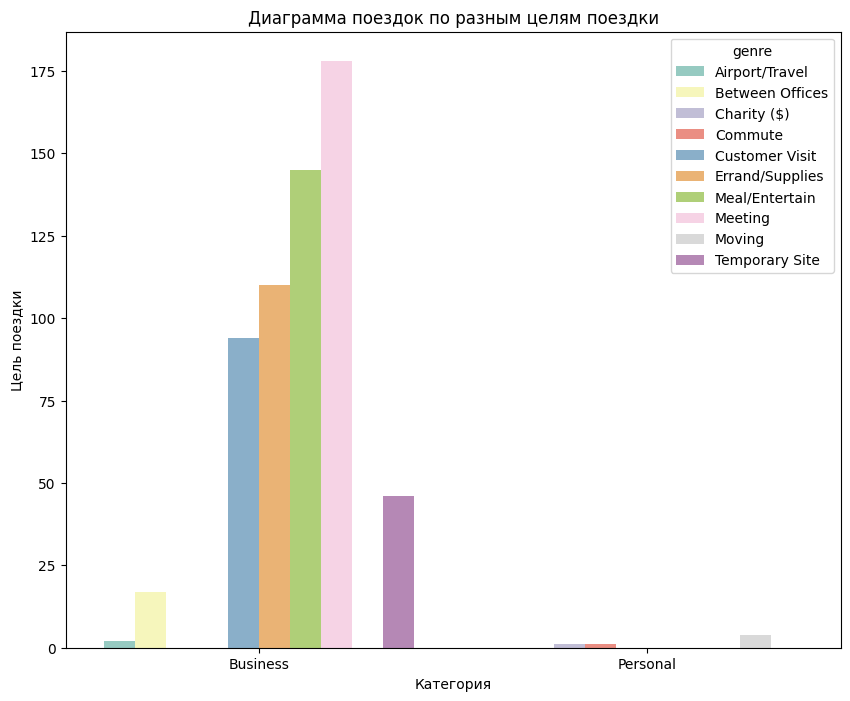

In [17]:
df_grouped = df.groupby(['PURPOSE*', 'CATEGORY*'], observed=True).size().reset_index(name='count')

plt.figure(figsize=(10, 8))
sns.barplot(
    data=df_grouped,
    x='CATEGORY*',
    y='count',
    hue='PURPOSE*',
    palette='Set3'
)
plt.title('Диаграмма поездок по разным целям поездки')
plt.xlabel('Категория')
plt.ylabel('Цель поездки')
plt.legend(title='genre')
plt.show()

##### Выводы:
* Из-за слишком огромной разницы между категориями поездок не удается качественно оценить по целям персональные поездки. 
* Самая частовстречаемая категория среди бизнес-поездок - встречи, что является характерной чертой этой категории. В личных поездках эта цель даже не значится, настолько она мала
* В топ 5 категорий бизнес-поездок вошли: "Встречи", "Прием пищи (обед)", "Поручения", "Встреча с покупателями" и "Временная стоянка". Для личных же поездок видно лишь 3 категории, а именно: "Переезд", "Короткие поездки" и "Благотворительность".


#### 6. Построение диаграммы минимальной стоимости по различным локациям

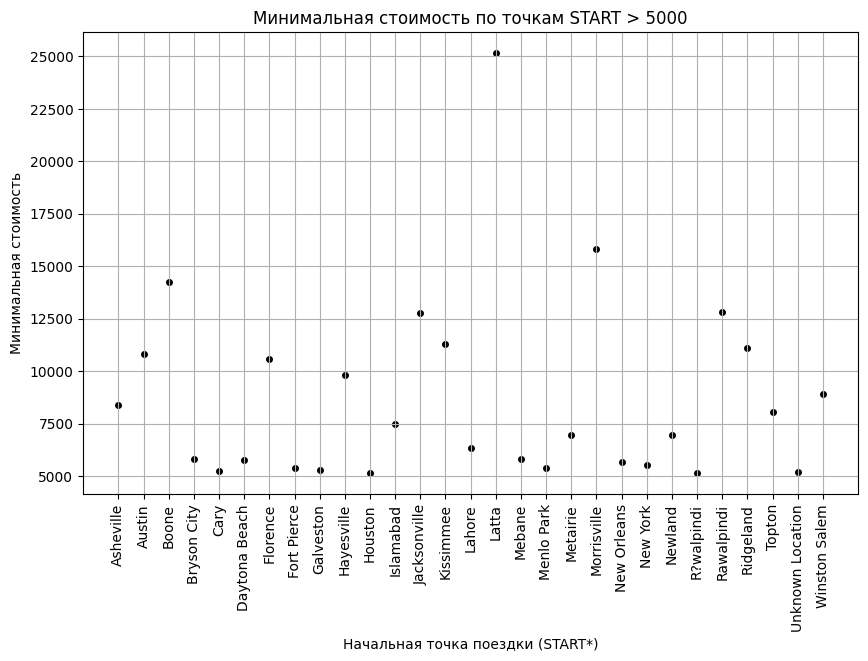

In [18]:
pivot = df[df['price'] > 5000].pivot_table(index='START*', values='price', aggfunc='min')
plt.figure(figsize=(10, 6))

plt.scatter(pivot.index, pivot.values, color='k', s=16)

# Настройка осей
plt.xticks(rotation=90)
plt.xlabel("Начальная точка поездки (START*)")
plt.ylabel("Минимальная стоимость")
plt.title("Минимальная стоимость по точкам START > 5000")
plt.grid(True)
plt.show()


#### Выводы:
* Нашелся неявный дубликат в исходных данных в столбце "START*" ("R?walpindi" и "Rawalpindi"). Ниже он будет заменен на правильное название.
* Минимальная цена поездки, которая выше 5000, представлена в: "Cary", "Houston", "Rawalpindi" и "Unknown Location".
* Максимальная цена поездки изображена в точке "Latta", что требует дополнительной проверки.
* Больше 50% минимальной стоимости, выше 5000 не превосходят 7500.

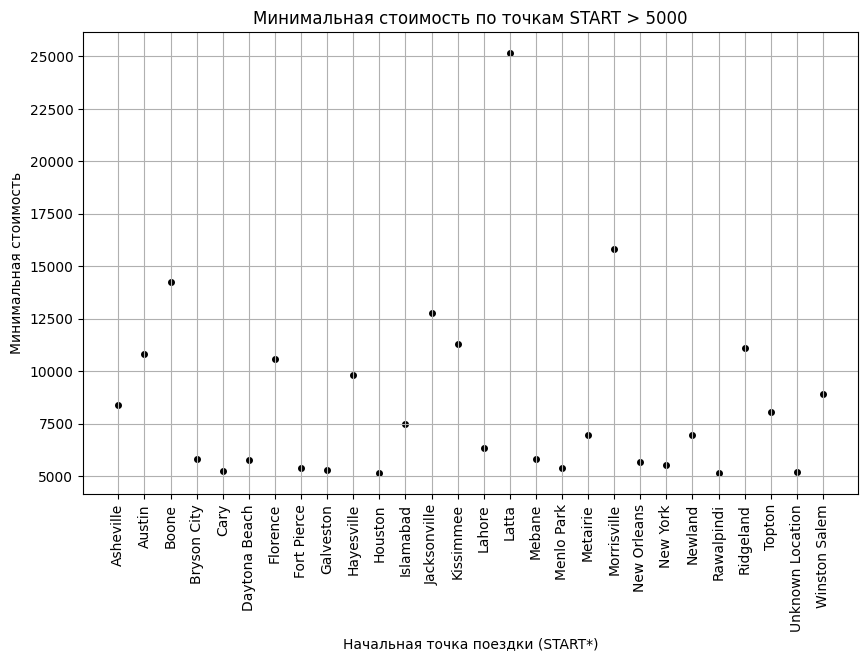

In [19]:
df.replace('R?walpindi', 'Rawalpindi', inplace=True)
pivot = df[df['price'] > 5000].pivot_table(index='START*', values='price', aggfunc='min')
plt.figure(figsize=(10, 6))

plt.scatter(pivot.index, pivot.values, color='k', s=16)

# Настройка осей
plt.xticks(rotation=90)
plt.xlabel("Начальная точка поездки (START*)")
plt.ylabel("Минимальная стоимость")
plt.title("Минимальная стоимость по точкам START > 5000")
plt.grid(True)
plt.show()


In [20]:
display(df[df['START*'] == "Latta"])

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*,time,speed,price
269,2016-03-25 16:52:00,2016-03-25 22:22:00,Business,Latta,Jacksonville,310.3,Customer Visit,330.0,56.418182,25155.0


Запись не содержит никаких аномальных данных, хоть и является единичной в своем роде.

#### 7. Распределение поездок по категориям

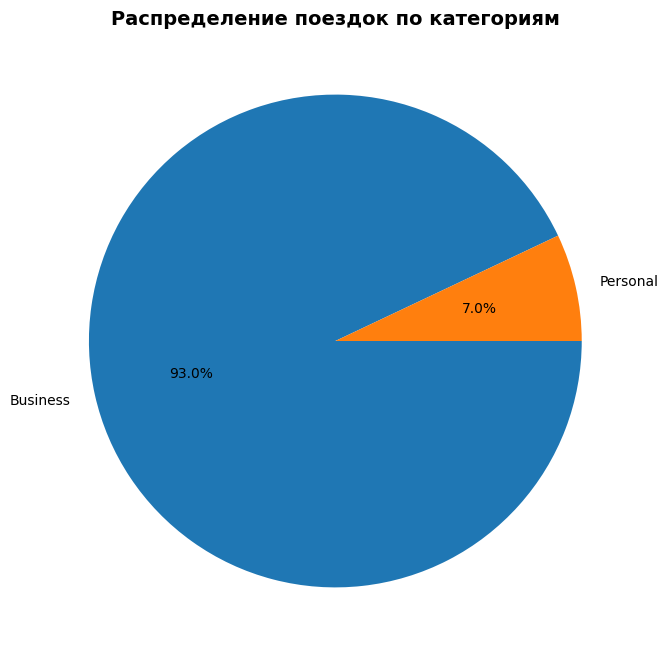

In [21]:
purpose_counts = df['CATEGORY*'].value_counts()

fig, ax = plt.subplots(figsize=(10,8))

ax.pie(
    purpose_counts.values,
    labels=purpose_counts.index,
    autopct="%.1f%%",
    textprops={'fontsize': 10},
    counterclock=False,
)

ax.set_title("Распределение поездок по категориям", fontsize=14, fontweight='bold')
plt.show()

##### Выводы:
* Количество поездок категории "Business" значительно выше категории "Personal" - это говорит о массовости рынка такси для коммерческих предприятий.
* Из-за того, что количество поездок по личным нуждам в разы меньше бизнес-поездок - данные могут не позволять корректно оценить этот блок.

<Axes: xlabel='MILES*', ylabel='speed'>

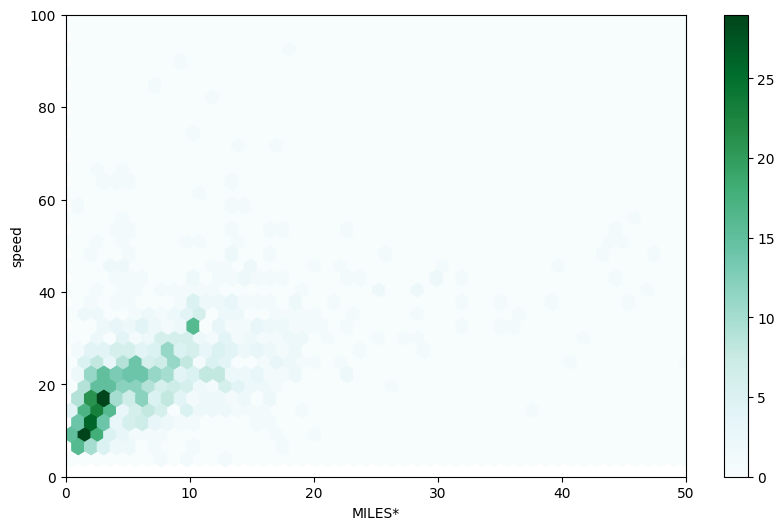

In [22]:
df.plot(x='MILES*', y='speed', kind='hexbin', gridsize=300, figsize=(10,6), xlim=(0, 50), ylim=(0, 100))

##### Выводы:
* Самые распространенные поездки - на короткие расстояния, чему соответствуют малоскоростные поездки. Это говорит о том, что такие поездки скорее всего совершены в пределах города.
* После 10 миль за одну поездку или средней скорости 30 миль/час наблюдается резкое снижение плотности распределения значений.

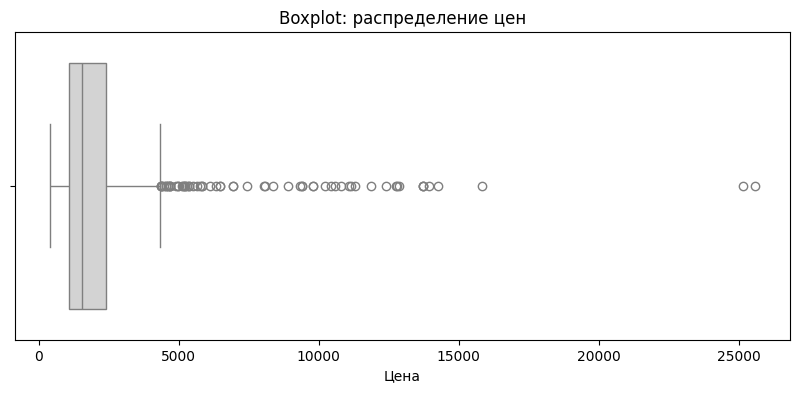

In [23]:
plt.figure(figsize=(10, 4))
sns.boxplot(x=df['price'], color='lightgrey')
plt.title('Boxplot: распределение цен')
plt.xlabel('Цена')
plt.show()

##### Выводы:
* Распределение цен сильно скошено вправо (положительная асимметрия) — большинство значений сосредоточено в нижней части диапазона, а небольшое число объектов имеет значительно более высокие цены.
* Основная масса данных (межквартильный размах, то есть 50 % наблюдений) находится примерно в диапазоне от около 1000 до 4000.
* Медиана расположена ближе к нижней границе ящика, что также подтверждает правостороннюю асимметрию.
* Много выбросов — значительное количество точек справа от ящика показывает, что в данных присутствуют единичные наблюдения с аномально высокими ценами (до ~25 000).

Следовательно, можно сказать, что цены распределены неравномерно: большинство товаров или объектов имеют относительно низкую стоимость, а высокие цены встречаются редко, но существенно увеличивают диапазон значений.

<Figure size 800x600 with 0 Axes>

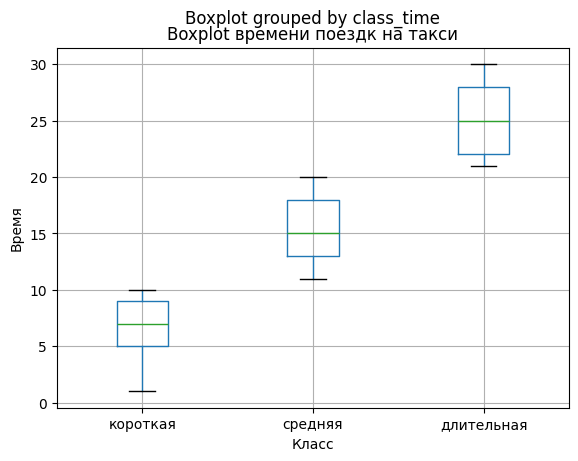

In [26]:
df['class_time'] = pd.cut(df['time'], bins = [0, 10, 20, 30], labels=['короткая', 'средняя', 'длительная'], include_lowest=True)

plt.figure(figsize=(8, 6))
df.boxplot(by='class_time', column='time')
#sns.boxplot(x='class_time', y='time', data=df, palette='Set2', hue='class_time', legend=False)
plt.title('Boxplot времени поездк на такси')
plt.xlabel('Класс')
plt.ylabel('Время')
plt.show()

##### Выводы:
* Продолжительность поездок закономерно возрастает от коротких к средним и длительным поездкам — распределение времени чётко разделено по классам.
* Медианное время каждой категории увеличивается последовательно:
1) короткие поездки — около 7 минут,
2) средние — около 15 минут,
3) длительные — около 25 минут.
* Разброс значений (межквартильный размах) также увеличивается с ростом класса: чем длиннее поездка, тем больше вариативность времени.
* Выбросы отсутствуют, что говорит о стабильности данных внутри каждой категории.

Таким образом, можно заключить, что классификация поездок по длительности корректна и отражает реальное различие во времени поездок, а распределение в каждой группе относительно равномерное и не содержит аномальных значений.

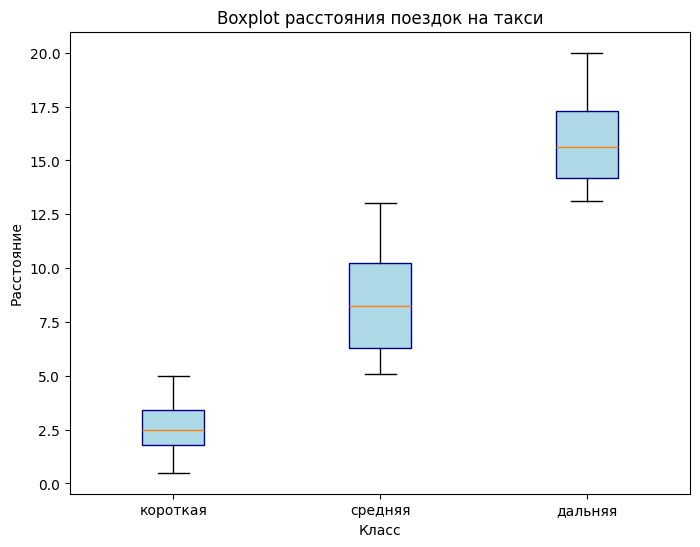

In [274]:
df['class_miles'] = pd.cut(df['MILES*'], bins = [0, 5, 13, 20], labels=['короткая', 'средняя', 'дальняя'], include_lowest=True)

plt.figure(figsize=(8, 6))
plt.boxplot(
    [df[df['class_miles'] == lvl]['MILES*'] for lvl in ['короткая', 'средняя', 'дальняя']],
    tick_labels=['короткая', 'средняя', 'дальняя'], patch_artist=True,
    boxprops=dict(facecolor="lightblue", color="darkblue")
)
plt.title('Boxplot расстояния поездок на такси')
plt.xlabel('Класс')
plt.ylabel('Расстояние')
plt.show()

##### Выводы по графику:
* Расстояние поездок закономерно увеличивается от коротких к средним и дальним поездкам, что подтверждает корректность разделения данных по классам.
* Медианные значения расстояния постепенно возрастают:
1) короткие поездки — около 2–3 км,
2) средние — примерно 8 км,
3) дальние — около 15–16 км.
* Разброс значений (межквартильный размах) увеличивается с ростом длины поездки, что говорит о большей вариативности для дальних маршрутов.
* Выбросы отсутствуют, следовательно, данные распределены достаточно равномерно в пределах каждой категории.

Таким образом, можно заключить, что классификация поездок по расстоянию адекватно отражает различие между группами, а структура данных показывает логичную зависимость между типом поездки и пройденным расстоянием.

#### Общие выводы

В ходе выполнения лабораторной работы были изучены и применены основные инструменты анализа и визуализации данных на языке Python с использованием библиотек Pandas, Seaborn и Matplotlib (Pyplot).

С помощью библиотеки Pandas были выполнены операции по загрузке, преобразованию и обработке данных: произведена очистка, фильтрация, группировка и агрегация таблиц. Это позволило получить сводные показатели и подготовить данные к визуальному анализу.

Библиотеки Seaborn и Pyplot использовались для построения различных видов графиков — гистограмм, столбчатых диаграмм, диаграмм рассеяния (scatter plot), линейных графиков и boxplot-диаграмм. С их помощью удалось наглядно проанализировать распределение данных, выявить зависимости между переменными и определить наличие выбросов.

Boxplot-диаграммы показали структуру распределения признаков и наличие аномальных значений, что особенно полезно при анализе стоимости, времени и расстояния поездок. Визуализация позволила сделать выводы о характере распределения данных (асимметрия, разброс, медианные значения) и подтвердить корректность классификации наблюдений.

В результате работы были закреплены навыки:
* работы с табличными данными в Pandas;
* визуализации данных средствами Seaborn и Matplotlib;
* интерпретации графических результатов анализа.

Таким образом, лабораторная работа продемонстрировала важность визуализации как инструмента для глубокого понимания структуры и закономерностей данных, а также показала практическую ценность Python-библиотек для анализа и представления информации.